# 1-Import All the Necessary Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
import numpy as np

# 2-Import The data

In [2]:
cars_df=pd.read_csv("Cars.csv")

In [3]:
cars_df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


# 3  Data Understanding 

In [4]:
cars_df.shape

(81, 5)

In [5]:
cars_df.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [6]:
cars_df.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

In [7]:
cars_df.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


C:\Users\Nasir\AppData\Local\Temp\ipykernel_9548\441262243.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_df["MPG"])


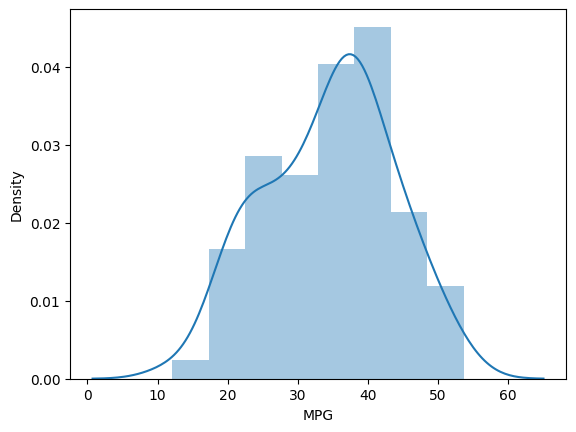

In [8]:
sns.distplot(cars_df["MPG"])
plt.show()

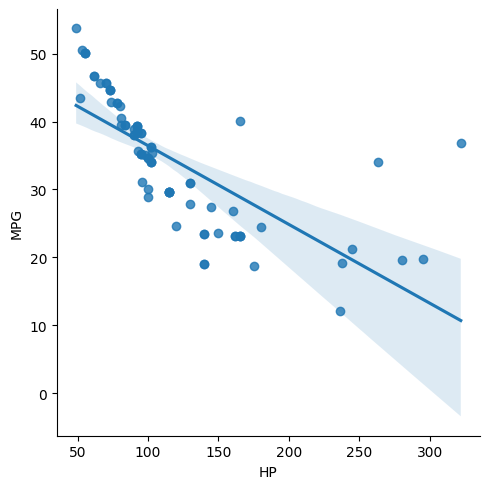

In [9]:
sns.lmplot(data=cars_df,x="HP",y='MPG')

# 4 Assumption Check

In [10]:
for i in cars_df.columns:
    print(i)

HP
MPG
VOL
SP
WT


# Assumption_1 Linearity Test

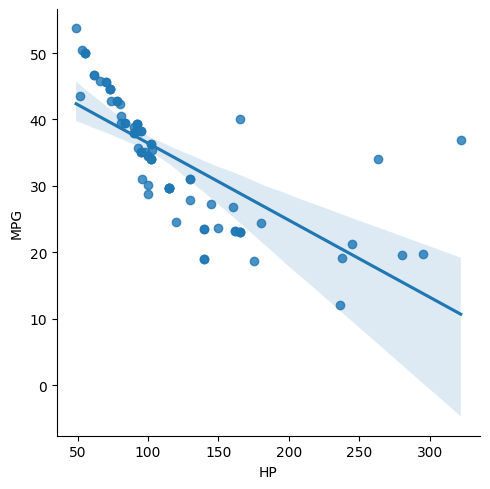

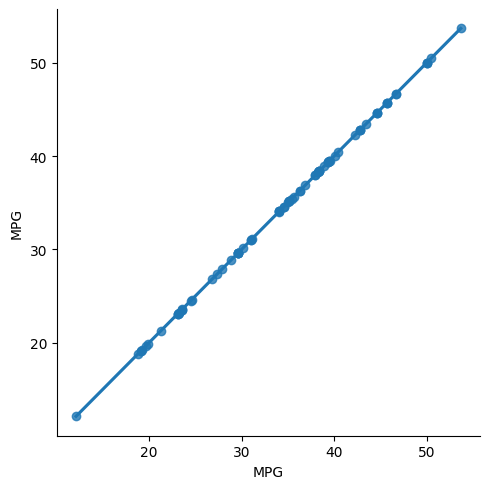

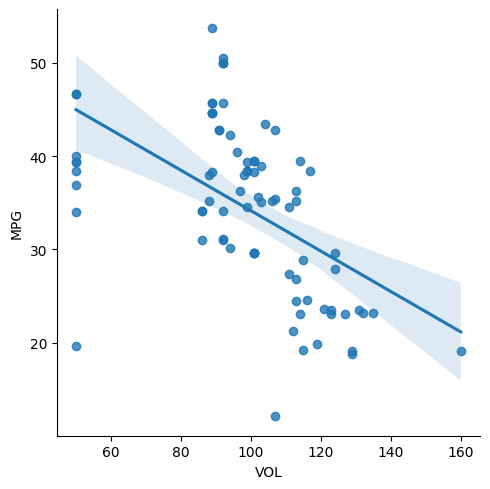

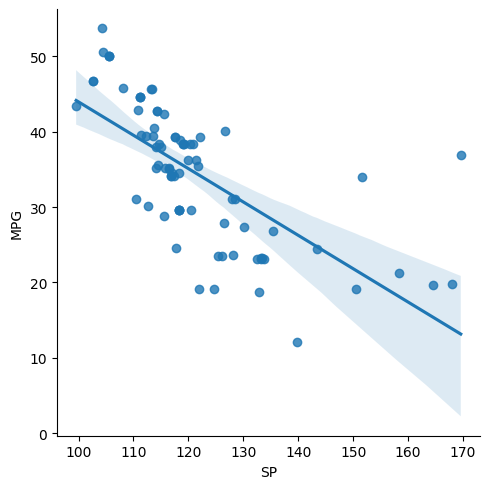

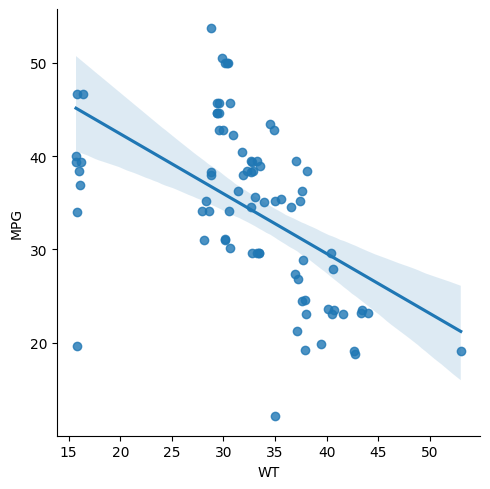

In [11]:
for i in cars_df.columns:
    sns.lmplot(data=cars_df,x=i,y='MPG')
    

# Linearity Test Failed

# Assumption_2 No MultiCollinearity

In [12]:
cars_df.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


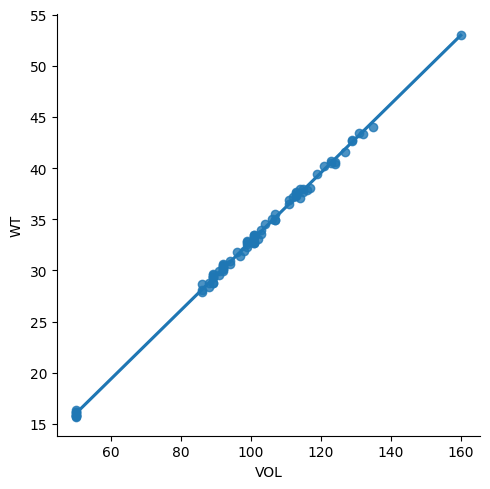

In [13]:
sns.lmplot(data=cars_df,x='VOL',y='WT')

<Axes: >

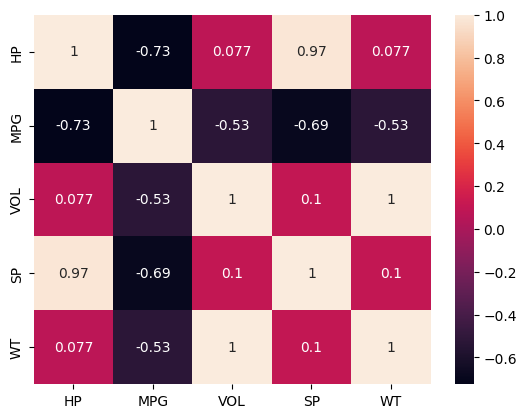

In [14]:
sns.heatmap(cars_df.corr(),annot=True)

## MultiCollinearity test failed

In [15]:
cars_df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


# Assumption_3 No AutoRegression  Passed

# 5 Data Prepration

In [16]:
cars_df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [17]:
x=cars_df.drop(labels="MPG",axis=1)

In [18]:
x

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [19]:
y=cars_df["MPG"]

In [20]:
y

0     53.700681
1     50.013401
2     50.013401
3     45.696322
4     50.504232
        ...    
76    36.900000
77    19.197888
78    34.000000
79    19.833733
80    12.101263
Name: MPG, Length: 81, dtype: float64

# 6 Model Building

In [21]:
model=LinearRegression()

# 7 Model Training   

In [22]:
model.fit(x,y)

LinearRegression()

In [23]:
model.intercept_

30.67733585215165

In [24]:
model.coef_

array([-0.20544372, -0.33605084,  0.39562692,  0.40057409])

# 8 Model Testing   

In [25]:
y_pred=model.predict(x)

In [26]:
cars_df["MPG"]

0     53.700681
1     50.013401
2     50.013401
3     45.696322
4     50.504232
        ...    
76    36.900000
77    19.197888
78    34.000000
79    19.833733
80    12.101263
Name: MPG, Length: 81, dtype: float64

In [27]:
y_pred

array([43.44193477, 42.38879289, 42.27934147, 42.53835981, 42.17264802,
       43.02061916, 42.32536062, 48.07621852, 48.28120247, 40.79122814,
       41.52153227, 47.80956747, 39.95980269, 41.52757889, 41.76632332,
       41.6181448 , 41.15094046, 47.98605515, 41.30861046, 37.87127922,
       38.57706414, 37.35199705, 37.89770285, 39.5625144 , 39.93380662,
       46.73870908, 35.48165898, 38.78152504, 38.24861192, 36.00285298,
       34.84603989, 37.21630246, 37.13919796, 34.82541399, 37.22361389,
       37.53950097, 39.27144845, 38.24219888, 38.54286458, 35.9391722 ,
       34.2129755 , 35.36313259, 37.50473376, 38.07998482, 35.79651664,
       36.2613377 , 34.21826465, 35.59393404, 36.91805291, 33.31108154,
       33.21313413, 33.3023649 , 29.19864884, 27.52358579, 28.3207133 ,
       28.56722621, 35.81583602, 33.02108459, 35.37334971, 32.29909503,
       29.87685849, 28.76093817, 25.14188416, 26.47040896, 25.97651933,
       36.35652478, 26.0975912 , 23.6416178 , 24.39887199, 20.21

In [28]:
mean_absolute_error(cars_df["MPG"],y_pred)

3.267968285420799

In [29]:
r2_score(cars_df["MPG"],y_pred)

0.7705372737359844

# Assumption_4 Homoscadasticity 

In [30]:
error=y-y_pred

In [31]:
error

0     10.258747
1      7.624608
2      7.734060
3      3.157963
4      8.331584
        ...    
76    15.617904
77     1.298838
78     7.863547
79     7.517122
80    -3.458218
Name: MPG, Length: 81, dtype: float64

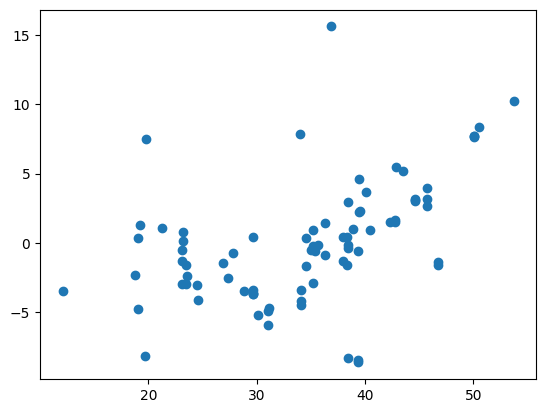

In [32]:
plt.scatter(x=cars_df['MPG'],y=error)

##  Homoscadasticity Failed

# Assumption_5 Zero Residual Mean 

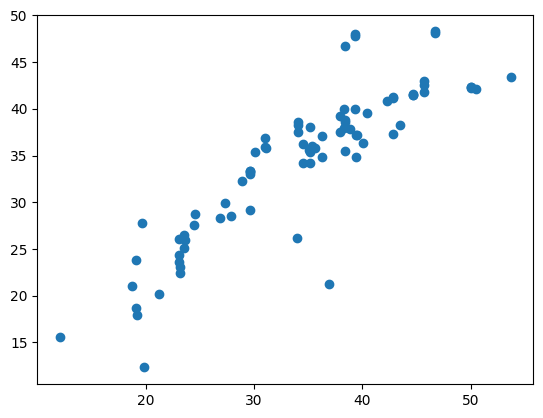

In [33]:
plt.scatter(x=y,y=y_pred)

##  Zero Residual Mean Failed

# Day_2

# StatsModels

In [34]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import statsmodels.formula.api as smf

In [36]:
model_1=smf.ols(formula='MPG~HP+VOL+SP+WT',data=cars_df).fit()

In [37]:
cars_df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [38]:
model_1.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [39]:
model_1.aic # The Akaike information criterion (AIC) is a metric used to compare the fit of different regression models. 
# The lower the AIC, the better the model fit.

477.9279049354879

In [40]:
model_1.bic # The Bayesian Information Criterion (BIC) is a metric used to compare the goodness of fit of different regression models.
# A lower BIC indicates a better balance between model fit and complexity

489.9001507088501

In [41]:
model_1.rsquared # coefficient of determination
# RSS	=	sum of squares of residuals
# TSS	=	total sum of squares
# The Higher the rsquared, the better the model fit. 

0.7705372737359844

In [42]:
model_1.rsquared_adj # Adjusted R-squared is a modified version of R-squared that adjusts for predictors that are not significant in a regression model.

0.7584602881431415

In [43]:
# A lower adjusted R-squared indicates that the additional input variables are not adding value to the model.
# he Higher the rsquared_adj, the better the model fit. 

# AIC
##  The Akaike information criterion (AIC) is a metric used to compare the fit of different regression models. 
##  The lower the AIC, the better the model fit.

# BIC 
## The Bayesian Information Criterion (BIC) is a metric used to compare the goodness of fit of different regression models.
##  A lower BIC indicates a better balance between model fit and complexity

# rsquared
## coefficient of determination
## RSS	=	sum of squares of residuals
## TSS	=	total sum of squares
## The Higher the rsquared, the better the model fit. 

# Adjusted R-squared 

## is a modified version of R-squared that adjusts for predictors that are not significant in a regression model.
## A lower adjusted R-squared indicates that the additional input variables are not adding value to the model.
## The Higher the rsquared_adj, the better the model fit. 

In [44]:
model_1=smf.ols(formula='MPG~HP+VOL+SP+WT',data=cars_df).fit()

print("AIC",model_1.aic)

print("Bic",model_1.bic)

print("r2",model_1.rsquared )

print("r2_add",model_1.rsquared_adj )

AIC 477.9279049354879
Bic 489.9001507088501
r2 0.7705372737359844
r2_add 0.7584602881431415


In [45]:
model_1=smf.ols(formula='MPG~HP+VOL+SP+WT',data=cars_df).fit()

print("AIC",model_1.aic)

print("Bic",model_1.bic)

print("r2",model_1.rsquared )

print("r2_add",model_1.rsquared_adj )

AIC 477.9279049354879
Bic 489.9001507088501
r2 0.7705372737359844
r2_add 0.7584602881431415


In [46]:
model_1=smf.ols(formula='MPG~HP',data=cars_df).fit()

print("AIC",model_1.aic)

print("Bic",model_1.bic)

print("r2",model_1.rsquared )

print("r2_add",model_1.rsquared_adj )

AIC 530.7452702659343
Bic 535.5341685752792
r2 0.5256806086282022
r2_add 0.5196765656994453


<Axes: >

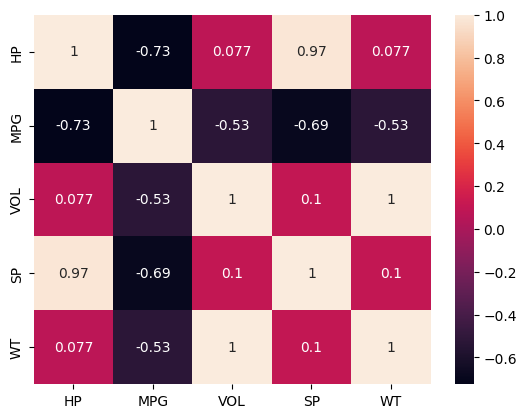

In [47]:
sns.heatmap(cars_df.corr(),annot=True)

In [48]:
model_1=smf.ols(formula='MPG~VOL',data=cars_df).fit()

print("AIC",model_1.aic)

print("Bic",model_1.bic)

print("r2",model_1.rsquared )

print("r2_add",model_1.rsquared_adj )

AIC 564.5634161305575
Bic 569.3523144399023
r2 0.27990086511227064
r2_add 0.27078568618964105


In [49]:
model_1=smf.ols(formula='MPG~SP',data=cars_df).fit()

print("AIC",model_1.aic)

print("Bic",model_1.bic)

print("r2",model_1.rsquared )

print("r2_add",model_1.rsquared_adj )

AIC 539.408199092848
Bic 544.1970974021929
r2 0.4721402334141218
r2_add 0.46545846421683224


In [50]:
model_1=smf.ols(formula='MPG~WT',data=cars_df).fit()

print("AIC",model_1.aic)

print("Bic",model_1.bic)

print("r2",model_1.rsquared )

print("r2_add",model_1.rsquared_adj )

AIC 564.8358142145094
Bic 569.6247125238542
r2 0.2774751389270127
r2_add 0.2683292546096331


In [51]:
model_1=smf.ols(formula='MPG~HP+SP',data=cars_df).fit()

print("AIC",model_1.aic)

print("Bic",model_1.bic)

print("r2",model_1.rsquared )

print("r2_add",model_1.rsquared_adj )

AIC 531.5481466080848
Bic 538.7314940721021
r2 0.5326391712851648
r2_add 0.5206555602924767


In [52]:
model_1=smf.ols(formula='MPG~HP+VOL',data=cars_df).fit()

print("AIC",model_1.aic)

print("Bic",model_1.bic)

print("r2",model_1.rsquared )

print("r2_add",model_1.rsquared_adj )

AIC 480.6569237052377
Bic 487.84027116925506
r2 0.7506606277376422
r2_add 0.7442673105001458


In [53]:
model_1=smf.ols(formula='MPG~HP+SP+WT',data=cars_df).fit()

print("AIC",model_1.aic)

print("Bic",model_1.bic)

print("r2",model_1.rsquared )

print("r2_add",model_1.rsquared_adj )

AIC 476.29927501529767
Bic 485.87707163398744
r2 0.7694828139983458
r2_add 0.7605016249333464


In [54]:
model_1=smf.ols(formula='MPG~HP+SP+WT+VOL',data=cars_df).fit()

print("AIC",model_1.aic)

print("Bic",model_1.bic)

print("r2",model_1.rsquared )

print("r2_add",model_1.rsquared_adj )

AIC 477.9279049354879
Bic 489.9001507088501
r2 0.7705372737359842
r2_add 0.7584602881431413


In [55]:
model_f1=smf.ols(formula='MPG~HP+SP+WT',data=cars_df).fit()

print("AIC",model_1.aic)

print("Bic",model_1.bic)

print("r2",model_1.rsquared )

print("r2_add",model_1.rsquared_adj )

AIC 477.9279049354879
Bic 489.9001507088501
r2 0.7705372737359842
r2_add 0.7584602881431413


In [56]:
# 0.7694828139983458

# Data transformation techniques if the data is CONTINUOUS:
Log Transformation

Square Root Transformation

Cube Root Transformation

Reciprocal Transformation

Boxcox Transformation

Standard Scaler

Min Max Scaler

Robust Scaler

#  Data transformation techniques if the data is DISCRETE:
Label Encoding

One Hot Encoding

In [57]:
cars_df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [58]:
cars_df1=cars_df.copy()

In [59]:
cars_df1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [60]:
cars_df1["log_hp"]=np.log(cars_df["HP"])

In [61]:
cars_df1

,HP,MPG,VOL,SP,WT,log_hp
0,49,53.700681,89,104.185353,28.762059,3.891820
1,55,50.013401,92,105.461264,30.466833,4.007333
2,55,50.013401,92,105.461264,30.193597,4.007333
3,70,45.696322,92,113.461264,30.632114,4.248495
4,53,50.504232,92,104.461264,29.889149,3.970292
...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552
77,238,19.197888,115,150.576579,37.923113,5.472271
78,263,34.000000,50,151.598513,15.769625,5.572154
79,295,19.833733,119,167.944460,39.423099,5.686975


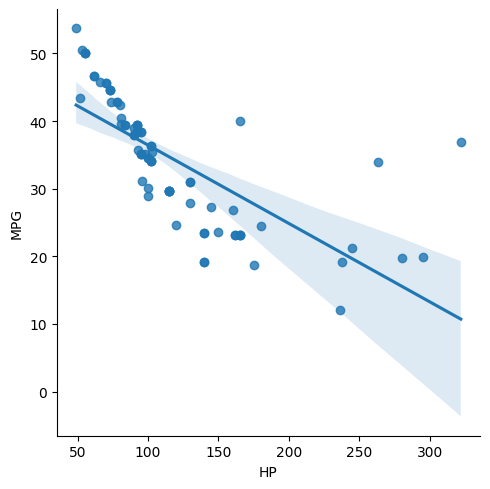

In [62]:
sns.lmplot(data=cars_df1,x="HP",y="MPG")

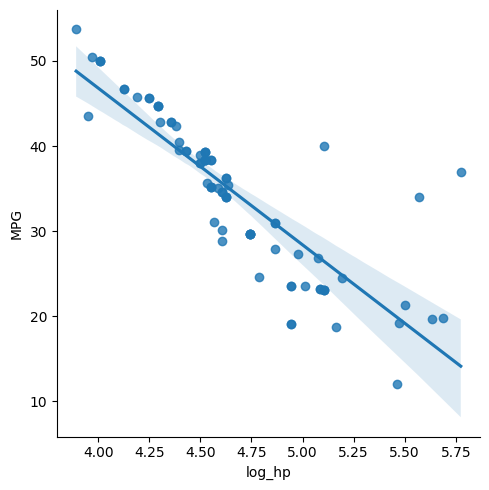

In [63]:
sns.lmplot(data=cars_df1,x="log_hp",y="MPG")

<Axes: >

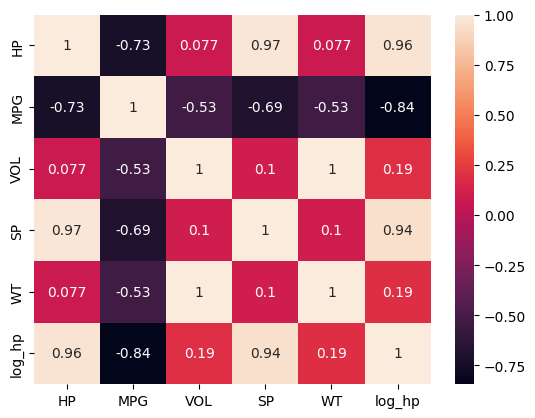

In [64]:
sns.heatmap(cars_df1.corr(),annot=True)

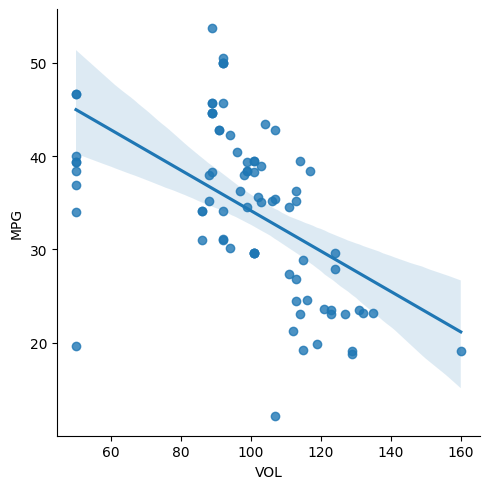

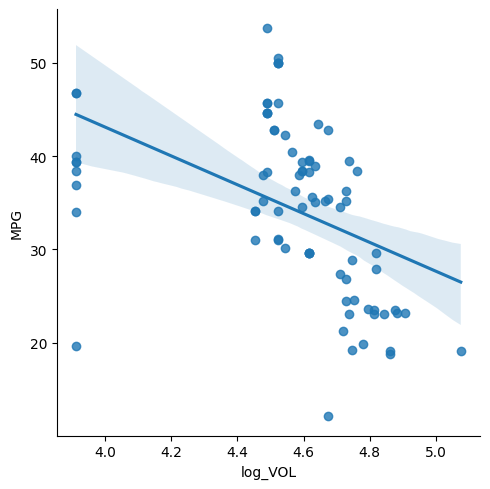

<Axes: >

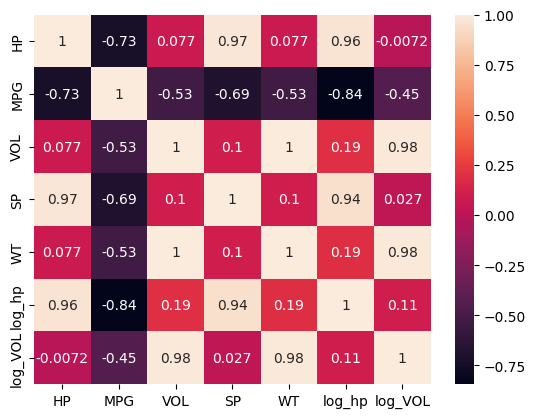

In [65]:
cars_df1["log_VOL"]=np.log(cars_df["VOL"])
sns.lmplot(data=cars_df1,x="VOL",y="MPG")
plt.show()
sns.lmplot(data=cars_df1,x="log_VOL",y="MPG")
plt.show()
sns.heatmap(cars_df1.corr(),annot=True)

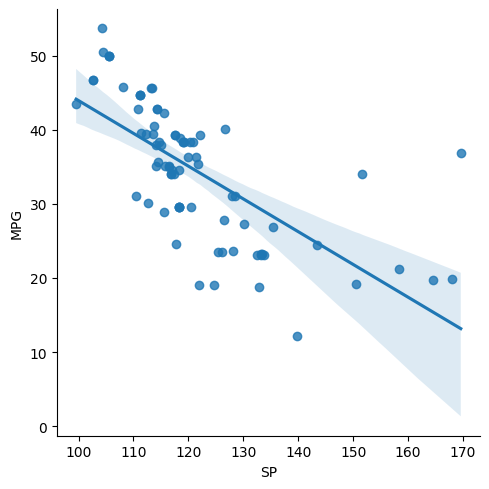

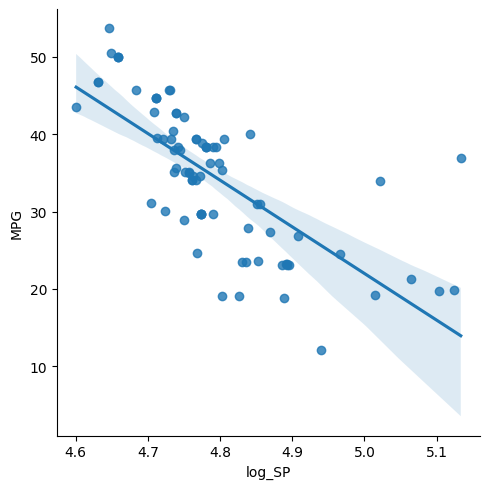

<Axes: >

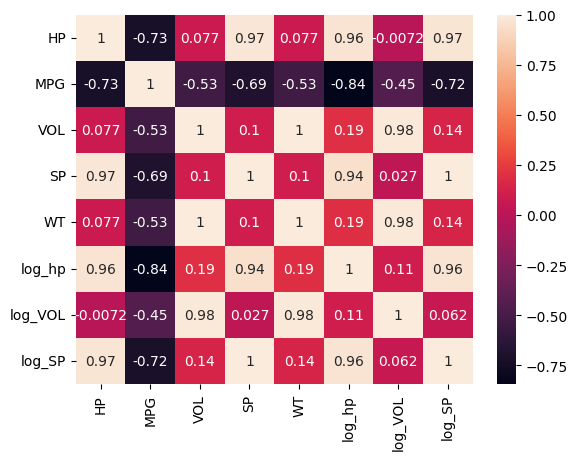

In [66]:
cars_df1["log_SP"]=np.log(cars_df["SP"])
sns.lmplot(data=cars_df1,x="SP",y="MPG")
plt.show()
sns.lmplot(data=cars_df1,x="log_SP",y="MPG")
plt.show()
sns.heatmap(cars_df1.corr(),annot=True)

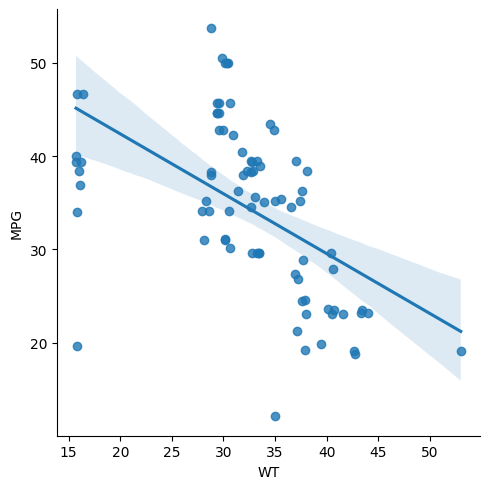

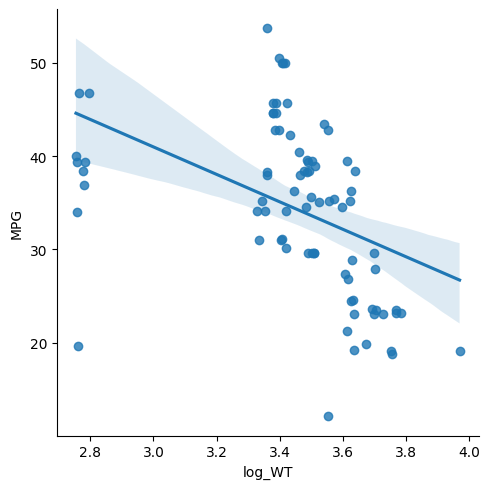

<Axes: >

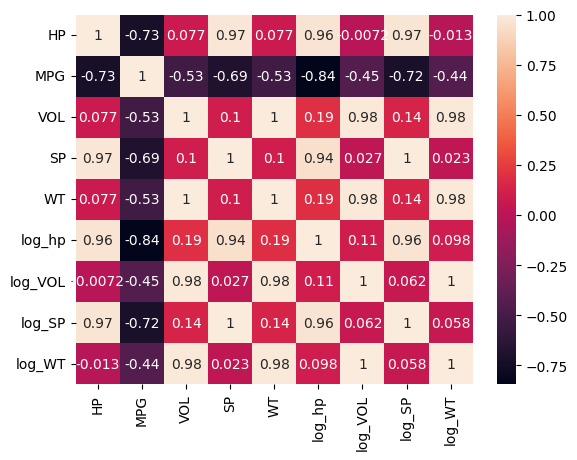

In [67]:
cars_df1["log_WT"]=np.log(cars_df["WT"])
sns.lmplot(data=cars_df1,x="WT",y="MPG")
plt.show()
sns.lmplot(data=cars_df1,x="log_WT",y="MPG")
plt.show()
sns.heatmap(cars_df1.corr(),annot=True)

# Day_03

In [68]:
cars_df1

,HP,MPG,VOL,SP,WT,log_hp,log_VOL,log_SP,log_WT
0,49,53.700681,89,104.185353,28.762059,3.891820,4.488636,4.646172,3.359057
1,55,50.013401,92,105.461264,30.466833,4.007333,4.521789,4.658344,3.416639
2,55,50.013401,92,105.461264,30.193597,4.007333,4.521789,4.658344,3.407630
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049
4,53,50.504232,92,104.461264,29.889149,3.970292,4.521789,4.648816,3.397495
...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,3.912023,5.133434,2.780864
77,238,19.197888,115,150.576579,37.923113,5.472271,4.744932,5.014472,3.635561
78,263,34.000000,50,151.598513,15.769625,5.572154,3.912023,5.021236,2.758086
79,295,19.833733,119,167.944460,39.423099,5.686975,4.779123,5.123633,3.674352


In [69]:
model_2=smf.ols(formula='MPG~HP',data=cars_df).fit()

print("AIC",model_2.aic)

print("Bic",model_2.bic)

print("r2",model_2.rsquared )

print("r2_add",model_2.rsquared_adj )

AIC 530.7452702659343
Bic 535.5341685752792
r2 0.5256806086282022
r2_add 0.5196765656994453


In [71]:
model_2=smf.ols(formula='MPG~log_hp',data=cars_df1).fit()

print("AIC",model_2.aic)

print("Bic",model_2.bic)

print("r2",model_2.rsquared )

print("r2_add",model_2.rsquared_adj )

AIC 490.4986085730722
Bic 495.28750688241706
r2 0.7114095515436409
r2_add 0.7077565078922946


In [72]:
model_2=smf.ols(formula='MPG~VOL',data=cars_df).fit()

print("AIC",model_2.aic)

print("Bic",model_2.bic)

print("r2",model_2.rsquared )

print("r2_add",model_2.rsquared_adj )

AIC 564.5634161305575
Bic 569.3523144399023
r2 0.27990086511227064
r2_add 0.27078568618964105


In [73]:
model_2=smf.ols(formula='MPG~log_VOL',data=cars_df1).fit()

print("AIC",model_2.aic)

print("Bic",model_2.bic)

print("r2",model_2.rsquared )

print("r2_add",model_2.rsquared_adj )

AIC 573.0814921857461
Bic 577.870390495091
r2 0.2000491225011476
r2_add 0.18992316202647852


In [74]:
model_2=smf.ols(formula='MPG~SP',data=cars_df1).fit()

print("AIC",model_2.aic)

print("Bic",model_2.bic)

print("r2",model_2.rsquared )

print("r2_add",model_2.rsquared_adj )

AIC 539.408199092848
Bic 544.1970974021929
r2 0.4721402334141218
r2_add 0.46545846421683224


In [75]:
model_2=smf.ols(formula='MPG~log_SP',data=cars_df1).fit()

print("AIC",model_2.aic)

print("Bic",model_2.bic)

print("r2",model_2.rsquared )

print("r2_add",model_2.rsquared_adj )

AIC 532.1442469181513
Bic 536.9331452274962
r2 0.5174173348052113
r2_add 0.5113086934736317


In [76]:
model_2=smf.ols(formula='MPG~WT',data=cars_df1).fit()

print("AIC",model_2.aic)

print("Bic",model_2.bic)

print("r2",model_2.rsquared )

print("r2_add",model_2.rsquared_adj )

AIC 564.8358142145094
Bic 569.6247125238542
r2 0.2774751389270127
r2_add 0.2683292546096331


In [77]:
model_2=smf.ols(formula='MPG~log_WT',data=cars_df1).fit()

print("AIC",model_2.aic)

print("Bic",model_2.bic)

print("r2",model_2.rsquared )

print("r2_add",model_2.rsquared_adj )

AIC 573.689208547852
Bic 578.4781068571968
r2 0.19402478308187288
r2_add 0.18382256514620032


In [79]:
model_2=smf.ols(formula='MPG~log_hp+VOL+log_SP',data=cars_df1).fit()

print("AIC",model_2.aic)

print("Bic",model_2.bic)

print("r2",model_2.rsquared )

print("r2_add",model_2.rsquared_adj )

AIC 396.9228310180591
Bic 406.5006276367489
r2 0.9134805433870519
r2_add 0.9101096554670669


In [80]:
model_2=smf.ols(formula='MPG~log_hp+log_VOL+log_SP',data=cars_df1).fit()

print("AIC",model_2.aic)

print("Bic",model_2.bic)

print("r2",model_2.rsquared )

print("r2_add",model_2.rsquared_adj )

AIC 399.1034940191333
Bic 408.68129063782305
r2 0.9111196497498921
r2_add 0.9076567789609269


In [81]:
model_F2=smf.ols(formula='MPG~log_hp+VOL+log_SP',data=cars_df1).fit()

print("AIC",model_2.aic)

print("Bic",model_2.bic)

print("r2",model_2.rsquared )

print("r2_add",model_2.rsquared_adj )

AIC 399.1034940191333
Bic 408.68129063782305
r2 0.9111196497498921
r2_add 0.9076567789609269


In [82]:
y_stats_pred=model_F2.predict()

In [83]:
y_stats_pred

array([52.50818905, 48.89204579, 48.89204579, 45.77209264, 49.49863646,
       46.00269867, 48.89204579, 48.34505739, 48.34505739, 42.1673822 ,
       43.17478536, 44.49572302, 40.56747463, 43.17478536, 44.71901609,
       43.17478536, 42.65197164, 44.49572302, 42.65197164, 38.54140709,
       38.70693521, 39.98187783, 38.02881149, 40.26598674, 38.9902486 ,
       42.56295602, 37.26310209, 38.70693521, 44.93563374, 35.28268179,
       36.26784232, 37.2640766 , 35.81801441, 34.52909674, 37.89019993,
       37.01248866, 37.78768951, 35.42894759, 35.42894759, 33.01261744,
       33.91521523, 34.46335254, 34.95573323, 35.86216134, 34.88224977,
       34.47083629, 33.52158852, 34.23523555, 33.51605515, 29.97063887,
       29.97063887, 29.97063887, 28.13223341, 26.75838584, 26.65937872,
       27.40312427, 32.51923734, 29.97063887, 32.25459269, 31.28709897,
       27.52036961, 25.99807277, 23.58982725, 24.25251991, 23.7327376 ,
       29.20735553, 23.8019775 , 22.68552914, 23.02969395, 23.31

In [84]:
mean_absolute_error(cars_df["MPG"],y_pred)

3.267968285420799

In [85]:
mean_absolute_error(cars_df["MPG"],y_stats_pred)

1.5953938252580608

In [ ]:
# 0.9111196497498921

# Detecting Influencers/Outliers
1. Cooks Distance
2. High Influence Points
1. Cooks Distance
Cook’s distance, is used in Regression Analysis to find influential outliers in a set of independent
variables.

In other words, it’s a way to identify points that negatively affect your regression model.

The measurement is a combination of each observation’s leverage and residual values.

The higher the leverage and residuals, the higher the Cook’s distance.

Several interpretations for Cook’s distance exist. There isn’t a universally accepted rule for cut off
points.

If you have a lot of points with large Cook's Distance values, that could indicate a problem with
your regression model in general.


In [86]:
model_F2_Outliers=model_F2.get_influence()

In [90]:
dis,_=model_F2_Outliers.cooks_distance

In [91]:
dis

array([4.76197795e-03, 2.62846787e-03, 2.62846787e-03, 1.04294457e-05,
       2.26107737e-03, 1.59812312e-04, 2.62846787e-03, 1.10823286e-02,
       1.10823286e-02, 1.78880399e-05, 1.93448992e-03, 7.39214449e-02,
       2.46185959e-03, 1.93448992e-03, 1.12245392e-03, 1.93448992e-03,
       1.80830394e-05, 7.39214449e-02, 1.80830394e-05, 1.08067207e-04,
       6.60294076e-05, 7.65615616e-03, 6.31815538e-05, 2.89601772e-05,
       2.85776752e-04, 5.55441337e-02, 2.31040499e-03, 6.60294076e-05,
       4.43299747e-03, 1.01317646e-05, 8.69872064e-03, 3.07926699e-03,
       9.56689798e-05, 2.55419162e-03, 1.90109801e-03, 4.60195805e-04,
       2.04146288e-05, 1.54893839e-03, 1.54893839e-03, 2.57707249e-03,
       1.05219849e-03, 2.76424037e-04, 4.78715927e-04, 4.89194621e-04,
       3.79790937e-04, 4.32860307e-06, 6.37595958e-04, 3.67242737e-04,
       4.59776823e-03, 1.34975360e-04, 1.34975360e-04, 1.34975360e-04,
       2.51418201e-03, 1.15648190e-02, 3.96639417e-05, 2.12315459e-04,
      

In [92]:
_

array([0.99995378, 0.99998588, 0.99998588, 1.        , 0.99998954,
       0.99999995, 0.99998588, 0.99975187, 0.99975187, 1.        ,
       0.99999234, 0.98988337, 0.99998761, 0.99999234, 0.99999742,
       0.99999234, 1.        , 0.98988337, 1.        , 0.99999998,
       0.99999999, 0.99988101, 0.99999999, 1.        , 0.99999983,
       0.99414118, 0.99998908, 0.99999999, 0.99995993, 1.        ,
       0.99984661, 0.99998063, 0.99999998, 0.99998666, 0.9999926 ,
       0.99999957, 1.        , 0.99999509, 0.99999509, 0.99998642,
       0.99999773, 0.99999984, 0.99999953, 0.99999951, 0.9999997 ,
       1.        , 0.99999917, 0.99999972, 0.9999569 , 0.99999996,
       0.99999996, 0.99999996, 0.99998708, 0.99972997, 1.        ,
       0.99999991, 0.99994539, 0.99999996, 0.99984703, 0.9999342 ,
       1.        , 0.9999685 , 1.        , 0.99999887, 1.        ,
       0.42041709, 0.99999941, 0.99999987, 1.        , 0.99911041,
       0.32091581, 0.99998857, 0.99999681, 0.99999971, 0.99958

<StemContainer object of 3 artists>

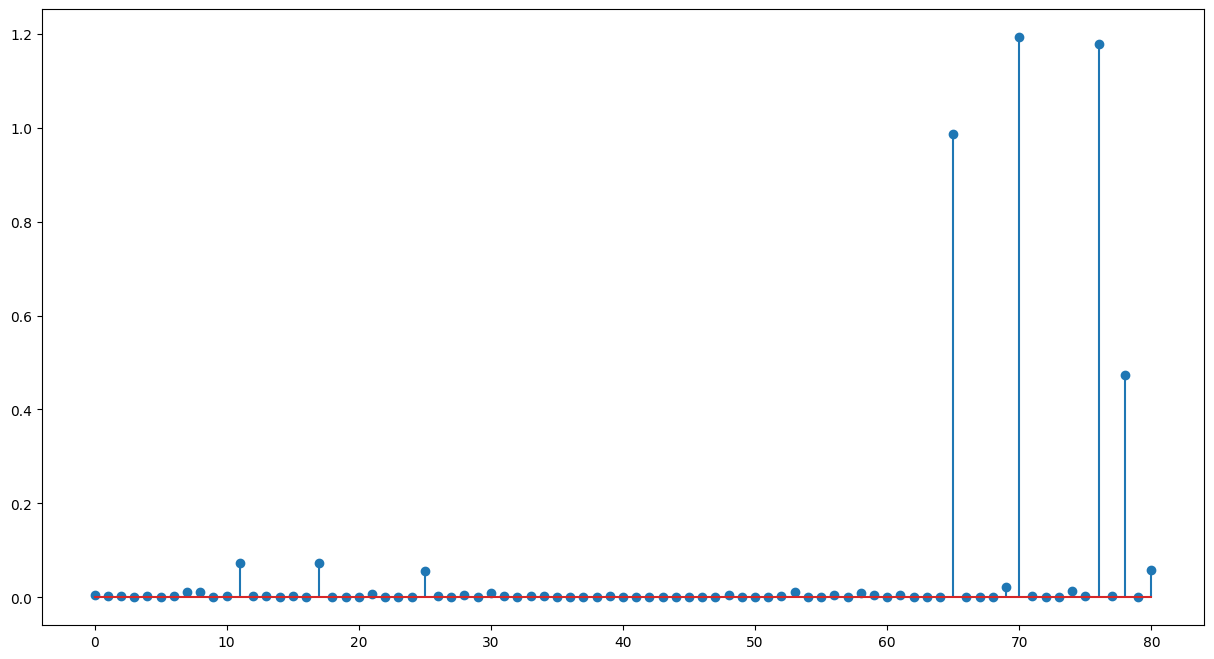

In [94]:
plt.figure(figsize=(15,8))
plt.stem(dis)

In [95]:
cars_df1['dis']=dis

In [96]:
cars_df1

,HP,MPG,VOL,SP,WT,log_hp,log_VOL,log_SP,log_WT,dis
0,49,53.700681,89,104.185353,28.762059,3.891820,4.488636,4.646172,3.359057,0.004762
1,55,50.013401,92,105.461264,30.466833,4.007333,4.521789,4.658344,3.416639,0.002628
2,55,50.013401,92,105.461264,30.193597,4.007333,4.521789,4.658344,3.407630,0.002628
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049,0.000010
4,53,50.504232,92,104.461264,29.889149,3.970292,4.521789,4.648816,3.397495,0.002261
...,...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,3.912023,5.133434,2.780864,1.177456
77,238,19.197888,115,150.576579,37.923113,5.472271,4.744932,5.014472,3.635561,0.002527
78,263,34.000000,50,151.598513,15.769625,5.572154,3.912023,5.021236,2.758086,0.472693
79,295,19.833733,119,167.944460,39.423099,5.686975,4.779123,5.123633,3.674352,0.000889


In [98]:
cars_df1.sort_values(by="dis",ascending=False)

,HP,MPG,VOL,SP,WT,log_hp,log_VOL,log_SP,log_WT,dis
70,280,19.678507,50,164.598513,15.823060,5.634790,3.912023,5.103509,2.761468,1.192439
76,322,36.900000,50,169.598513,16.132947,5.774552,3.912023,5.133434,2.780864,1.177456
65,165,40.050000,50,126.598513,15.712859,5.105945,3.912023,4.841021,2.754479,0.985781
78,263,34.000000,50,151.598513,15.769625,5.572154,3.912023,5.021236,2.758086,0.472693
11,92,39.354094,50,117.598513,15.753535,4.521789,3.912023,4.767276,2.757065,0.073921
...,...,...,...,...,...,...,...,...,...,...
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049,0.000010
29,103,35.404192,107,121.840817,35.549360,4.634729,4.672829,4.802715,3.570922,0.000010
62,140,23.515917,131,126.048103,43.390988,4.941642,4.875197,4.836664,3.770252,0.000009
68,165,23.103172,123,133.312342,40.472042,5.105945,4.812184,4.892695,3.700611,0.000007


In [99]:
from statsmodels.graphics.regressionplots import influence_plot

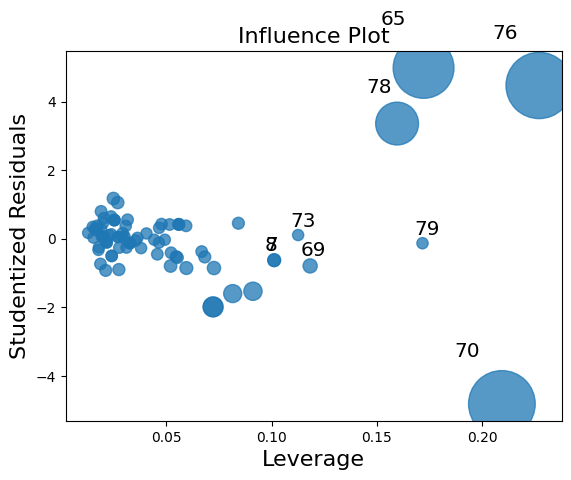

In [101]:
influence_plot(model_F2)
plt.show()

In [102]:
Nods=cars_df1.drop(labels=[70,78,65,76])

In [103]:
Nods

,HP,MPG,VOL,SP,WT,log_hp,log_VOL,log_SP,log_WT,dis
0,49,53.700681,89,104.185353,28.762059,3.891820,4.488636,4.646172,3.359057,0.004762
1,55,50.013401,92,105.461264,30.466833,4.007333,4.521789,4.658344,3.416639,0.002628
2,55,50.013401,92,105.461264,30.193597,4.007333,4.521789,4.658344,3.407630,0.002628
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049,0.000010
4,53,50.504232,92,104.461264,29.889149,3.970292,4.521789,4.648816,3.397495,0.002261
...,...,...,...,...,...,...,...,...,...,...
74,140,19.086341,129,121.864163,42.618698,4.941642,4.859812,4.802907,3.752293,0.014300
75,175,18.762837,129,132.864163,42.778219,5.164786,4.859812,4.889327,3.756029,0.002320
77,238,19.197888,115,150.576579,37.923113,5.472271,4.744932,5.014472,3.635561,0.002527
79,295,19.833733,119,167.944460,39.423099,5.686975,4.779123,5.123633,3.674352,0.000889


In [106]:
model_F2=smf.ols(formula='MPG~log_hp+VOL+log_SP',data=Nods).fit()

print("AIC",model_F2.aic)

print("Bic",model_F2.bic)

print("r2",model_F2.rsquared )

print("r2_add",model_F2.rsquared_adj )

AIC 232.50088232418523
Bic 241.87610401159998
r2 0.9870260995889484
r2_add 0.9864929255994531


In [107]:
model_FF=smf.ols(formula='MPG~log_hp+VOL+log_SP',data=Nods).fit()

print("AIC",model_F2.aic)

print("Bic",model_F2.bic)

print("r2",model_F2.rsquared )

print("r2_add",model_F2.rsquared_adj )

AIC 232.50088232418523
Bic 241.87610401159998
r2 0.9870260995889484
r2_add 0.9864929255994531


In [113]:
y_pred_nod=model_FF.predict()

In [114]:
y_pred_nod

array([54.24839821, 50.29431005, 50.29431005, 46.57192861, 51.01188385,
       46.57796686, 50.29431005, 45.9816966 , 45.9816966 , 42.53369664,
       43.31420653, 41.32851179, 41.04478144, 43.31420653, 45.1450324 ,
       43.31420653, 42.84630688, 41.32851179, 42.84630688, 39.08288523,
       38.9147144 , 41.19811675, 38.29031799, 40.52108788, 38.35913562,
       39.11575389, 38.80956748, 38.9147144 , 46.83164239, 35.61187682,
       37.46890964, 37.49157382, 35.37093191, 35.27115926, 38.23108962,
       36.9025219 , 36.93010717, 33.97959598, 33.97959598, 31.57784411,
       34.61270268, 34.63830536, 33.95377845, 34.69190549, 34.78719461,
       34.01293186, 33.95806938, 34.09977086, 31.6382633 , 28.94560082,
       28.94560082, 28.94560082, 28.81867937, 26.02039008, 25.98052231,
       27.90745891, 31.20214108, 28.94560082, 31.04567379, 31.74384592,
       26.8556723 , 25.66086871, 24.09745393, 24.16821553, 23.35810871,
       22.77597659, 22.61568348, 22.66573971, 21.79867166, 22.63

In [111]:
mean_absolute_error(cars_df["MPG"],y_pred)

3.267968285420799

In [112]:
mean_absolute_error(cars_df["MPG"],y_stats_pred)

1.5953938252580608

In [116]:
mean_absolute_error(Nods["MPG"],y_pred_nod)

0.8076634355409199

In [122]:
error

0     10.258747
1      7.624608
2      7.734060
3      3.157963
4      8.331584
        ...    
76    15.617904
77     1.298838
78     7.863547
79     7.517122
80    -3.458218
Name: MPG, Length: 81, dtype: float64

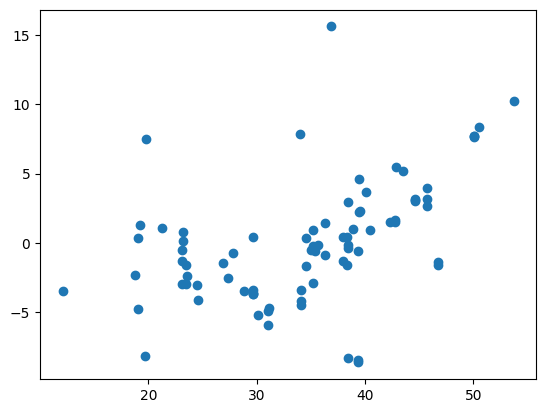

In [117]:
plt.scatter(x=cars_df['MPG'],y=error)

In [120]:
error_1=Nods["MPG"]-y_pred_nod

In [125]:
Nods["MPG"]

0     53.700681
1     50.013401
2     50.013401
3     45.696322
4     50.504232
        ...    
74    19.086341
75    18.762837
77    19.197888
79    19.833733
80    12.101263
Name: MPG, Length: 77, dtype: float64

In [126]:
y_pred_nod

array([54.24839821, 50.29431005, 50.29431005, 46.57192861, 51.01188385,
       46.57796686, 50.29431005, 45.9816966 , 45.9816966 , 42.53369664,
       43.31420653, 41.32851179, 41.04478144, 43.31420653, 45.1450324 ,
       43.31420653, 42.84630688, 41.32851179, 42.84630688, 39.08288523,
       38.9147144 , 41.19811675, 38.29031799, 40.52108788, 38.35913562,
       39.11575389, 38.80956748, 38.9147144 , 46.83164239, 35.61187682,
       37.46890964, 37.49157382, 35.37093191, 35.27115926, 38.23108962,
       36.9025219 , 36.93010717, 33.97959598, 33.97959598, 31.57784411,
       34.61270268, 34.63830536, 33.95377845, 34.69190549, 34.78719461,
       34.01293186, 33.95806938, 34.09977086, 31.6382633 , 28.94560082,
       28.94560082, 28.94560082, 28.81867937, 26.02039008, 25.98052231,
       27.90745891, 31.20214108, 28.94560082, 31.04567379, 31.74384592,
       26.8556723 , 25.66086871, 24.09745393, 24.16821553, 23.35810871,
       22.77597659, 22.61568348, 22.66573971, 21.79867166, 22.63

In [121]:
error_1

0    -0.547717
1    -0.280909
2    -0.280909
3    -0.875606
4    -0.507652
        ...   
74   -2.263620
75   -0.749712
77    0.697231
79    1.159884
80   -0.987145
Name: MPG, Length: 77, dtype: float64

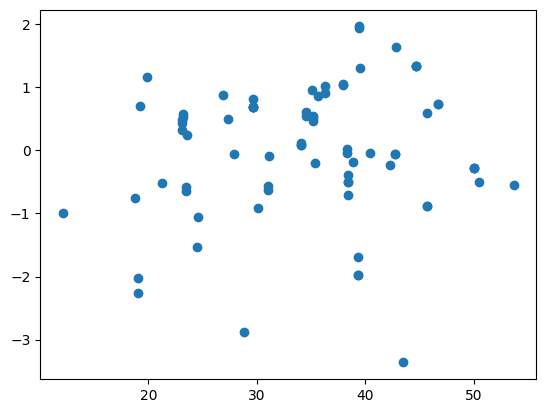

In [124]:
plt.scatter(x=Nods['MPG'],y=error_1)

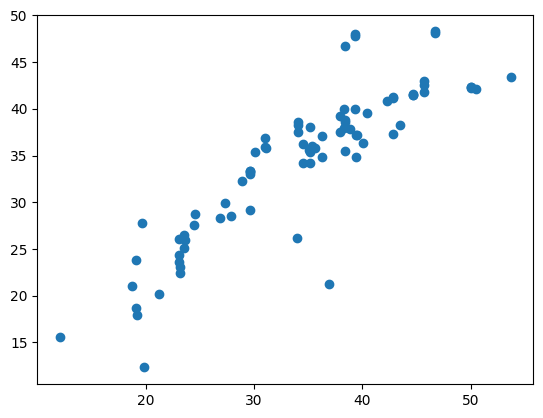

In [127]:
plt.scatter(x=y,y=y_pred)

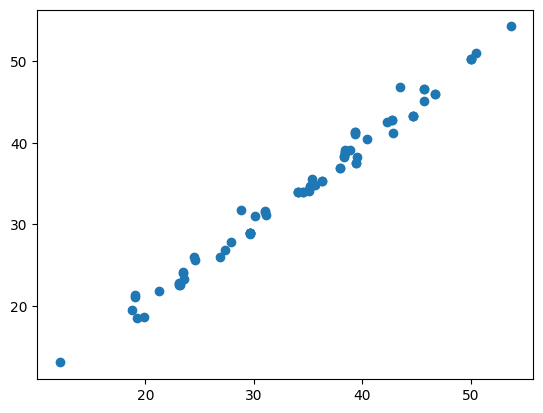

In [128]:
plt.scatter(x=Nods['MPG'],y=y_pred_nod)

In [108]:
import pickle

In [110]:
pickle.dump(model_FF, open('Batch_13_model.pkl','wb'))